# 1. Introducción al Procesamiento Digital de Señales

En este primer capítulo de este libro interactivo aprenderá sobre los fundamentos básicos del procesamiento digital de señales y la construcción de simulaciones en Python para generar señales, implementar sistemas y graficar señales.

Todo el libro ha sido construido como un cuaderno de Python o _Jupiter Notebook_ el cual le permite ingresar celdas de texto (en un lenguaje llamado Markdown) o código interactivo en Python, las cuales puede ejecutar dando clic en el botón ▷. Usted puede crear sus propios cuadernos incluyendo estos dos tipos de celda. Para más información sobre cómo definir estilos en los cuadernos de Python consulte el **Apéndice A**.

Para correr el código que se presenta en este cuaderno debe cargar primero ciertas librerías de Python. En este curso se usarán de manera recurrente la librería de procesamiento numérico **NumPy**, la científica **SciPy** y la de graficación **MatPlotLib**, así como librerías para habilitar los cuadernos interactivos (**IPyhton**). Estas librerías se pueden instalar dando clic en el botón ▷ de la siguiente celda desde Jupyter o VSCode, o escribiendo las siguientes líneas de código en una consola (o terminal) quitando el símbolo !. Esta celda debe ejecutarse solamente una vez después de instalar Python y no en cada sesión de trabajo. Si usa GoogleColab debe ejecutar obligatoriamente esta celda para instalar las bibliotecas en su entorno. 

In [ ]:
#Instala las bibliotecas (Solo si hay errores en la siguiente celda o usa GoogleColab)
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install ipykernels
!pip install ipympl

A continuación, se muestra como cargar las bibliotecas, lo cual debe hacer en cada sesión de trabajo. Nota: Si al ejecutar la celda en Jupyter o VSCode se produce un error **"ModuleNotFoundError"** debe instalar la librería como se indicó anteriormente. No olvide dar clic en el botón ▷ para ejecutar una celda interactiva.

In [2]:
# Carga las bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# 1.1. Señales en tiempo discreto y muestreo

Una señal, $x(t)$, se expresa en un entorno de simulación como un vector de datos $x[n]$, por consiguiente, los entornos de simulación asumen que la señal continua $x(t)$ ha sido muestreada a una frecuencia de muestreo, $f_s$, de tal forma que $x[n] = x(n T_s)$, con $n=0,1,2,...$, donde $T_s = 1/f_s$ se denomina periodo de muestreo. En otras palabras, **todos los entornos de simulación trabajan de manera implícita con señales discretas** del tipo $x[n]$.

El siguiente código muestra como crear una señal senoidal $x(t) = sin(2 \pi f_0 t)$ de frecuencia fundamental $f_0$, usando una frecuencia de muestreo $f_s$, y cómo graficar 5 periodos de esta señal usando la librería **MatplotLib**:

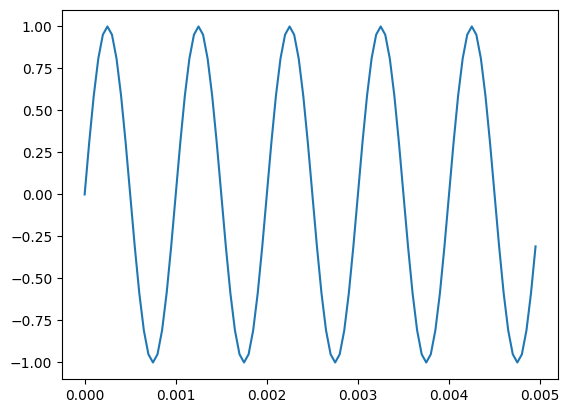

In [2]:
#Ejemplo 1.1.1.
fs = 20000 #Frecuencia de muestreo 20kHz
ts = 1/fs  #Periodo de muestreo

f0 = 1000  #Frecuencia fundamental 1kHz
t0 = 1/f0  #Periodo de la señal senoidal

t = np.arange(0, 5*t0, ts)
x = np.sin(2 * np.pi * f0 * t)

fig, ax = plt.subplots()
ax.plot(t, x)
plt.show()

Note que la clave en el código anterior fue crear el vector de tiempo $t$, pues la definición de la señal $x(t) = sin(2 \pi f_0 t)$ se hace escribiendo la misma ecuación pero reemplazando las funciones y símbolos especiales como $\pi$ y $sin$ por su equivalentes de la librería NumPy ``np.pi`` y ``np.sin``. 

Para crear el vector de tiempo se empleó la función ``np.arange`` que tiene tres parámetros: ``np.arange(Valor inicial, valor final, paso)``. El valor final se fijó en 5 periodos de la señal senoidal ``5*t0`` y el paso en el periodo de muestreo ``ts``, esto último en concordancia con la ecuación de muestreo definida anteriormente $x[n]=x(n T_s)$ con $n=0,1,2,3,...$.

En el ejemplo anterior, la función ``plot`` recibe dos parámetros, el vector del eje del tiempo y el vector con las amplitudes de la señal, pero se puede usar también con un único argumento correspondiente a las amplitudes de la señal, en cuyo caso, el eje del tiempo asume los valores enteros $n=0,1,2,3,...$ hasta la longitud del vector. Una forma típica de graficar las señales discretas, para hacer explícito el muestreo, es usar diagramas de deltas, $\delta[n]$, donde el eje del tiempo toma los valores enteros $n$. En este caso, se usa la función ``stem`` y no es necesario especificarle un vector de tiempo:

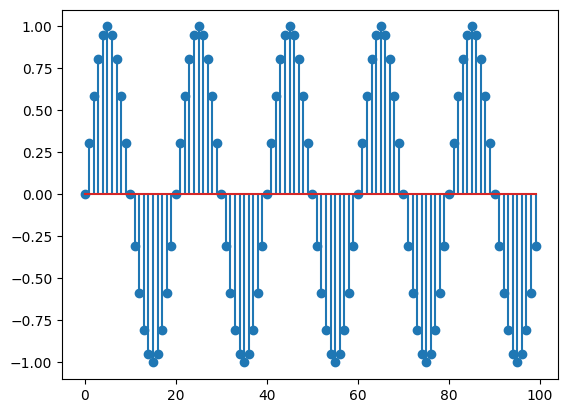

In [4]:
fig, ax = plt.subplots()
ax.stem(x)
plt.show()

Además, es posible cambiar el color y estilo del trazo empleando directivas adicionales a ``plot`` e incluir sobre una misma gráfica dos ejes como se muestra en el siguiente ejemplo:

Text(0, 0.5, 'Amplitud')

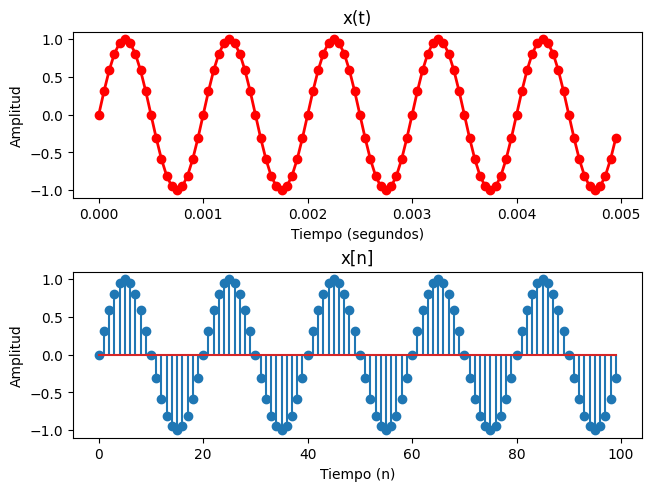

In [5]:
#Ejemplo 1.1.2.
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(t, x, 'ro-', linewidth=2)
axs[0].set_title('x(t)')
axs[0].set_xlabel('Tiempo (segundos)')
axs[0].set_ylabel('Amplitud')
axs[1].stem(x)
axs[1].set_title('x[n]')
axs[1].set_xlabel('Tiempo (n)')
axs[1].set_ylabel('Amplitud')

Note que el tercer parámetro de plot es una cadena que especifica el formato del trazado. En el ejemplo, ``ro-``, la ``r`` significa color rojo, el ``o`` que use un punto en el trazado y el ``-`` que use línea continua. En la siguiente tabla se muestran otras combinaciones que pueden tomar estos caracteres para obtener trazados de diferentes estilos. Puede consultar más estilos en https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

| Colores | Estilo del punto | Estilo de la línea |
|------|------|------|
| y amarillo | .  • | - línea sólida |
| m magenta | o  o | : línea punteada |
| c cían | x  × | -. línea y punto |
| r rojo | +  + | -- linea discontinua |
| g verde | *  ⋆ | |
| b azul | s   | |
| w blanco | d  ♢ | |
| k negro | v  ▽ | |
| | ^ △ | |
| | < ▹ | |
| | > ◃ | |

Asimismo, cuando se usó la función ``fig, axs = plt.subplots(2, 1, layout='constrained')`` se especificó un tamaño de 2x1, que significa la grafica se parte en dos filas y una columna. La primera subgráfica es el índice cero de ``axs[0]`` y sobre este se usan las mismas funciones descritas previamente para ``plot`` o ``stem``. ``axs[1]`` es la segunda subgráfica y así sucesivamente.

Finalmente, sí se quiere graficar dos o más gráficas superpuestas, se puede usar recurrentemente ``plot`` como se muestra en el siguiente ejemplo, donde se gráfica la señal senoidal ante dos frecuencias de muestreo diferentes. Note que en este ejemplo se añaden etiquetas a las gráficas con ``label``, las cuales se hacen visibles al generar la leyenda con ``legend``.

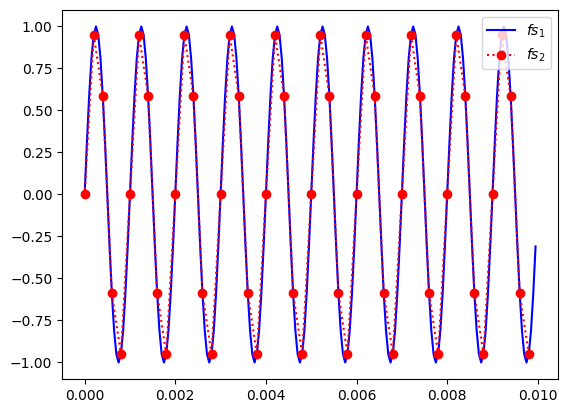

In [6]:
#Ejemplo 1.1.3. Muestreo de una señal continua senoidal ante dos diferentes frecuencias de muestreo 

f0 = 1000  #Frecuencia fundamental 1kHz
t0 = 1/f0  #Periodo de la señal senoidal

fs1 = 20000 #Frecuencia de muestreo 1 @ 20kHz
ts1 = 1/fs1 #Periodo de muestreo 1

fs2 = 5000  #Frecuencia de muestreo 2 @ 5kHz
ts2 = 1/fs2 #Periodo de muestreo 2

t1 = np.arange(0, 10*t0, ts1)
x1 = np.sin(2 * np.pi * f0 * t1)

t2 = np.arange(0, 10*t0, ts2)
x2 = np.sin(2 * np.pi * f0 * t2)

fig, ax = plt.subplots()
ax.plot(t1, x1, 'b-', label='$fs_1$')
ax.plot(t2, x2, 'ro:', label='$fs_2$')
ax.legend(bbox_to_anchor=(1,1),loc='upper right')
plt.show()

Matplotlib calcula automáticamente el rango de los ejes para permitir una mejor visualización. Sin embargo, este rango se puede modificar configurando las propiedades ``xlim`` y ``ylim`` como se muestra en el siguiente ejemplo que gráfica la misma señal de arriba pero en otro rango de tiempo.

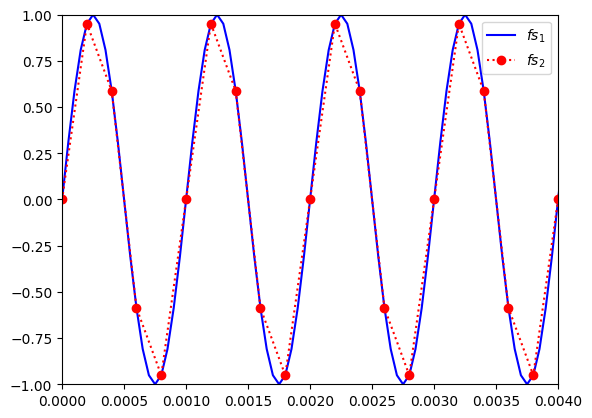

In [7]:
fig, ax = plt.subplots()
ax.plot(t1, x1, 'b-', label='$fs_1$')
ax.plot(t2, x2, 'ro:', label='$fs_2$')
ax.legend(bbox_to_anchor=(1,1),loc='upper right')
ax.set(xlim=(0, 0.004), ylim=(-1,1))
plt.show()

## Aspectos importantes:
* Recuerde que para muestrear adecuadamente una señal se debe aplicar el **teorema del muestreo** que establece que la frecuencia mínima de muestreo de una señal debe ser mínimo dos veces la frecuencia máxima presente en una señal:  $f_s \geq 2 f_{max}$.
* De esta ecuación se deriva que, sí la frecuencia de muestreo en un sistema digital se fija a $f_s$, entonces el rango de frecuencias que puede procesar dicho sistema es $-\frac{f_s}{2} \leq f \leq \frac{f_s}{2}$.
* Si se invalida el teorema del muestreo se produce un efecto conocido con el nombre de **_aliasing_** que significa que la señal muestreada tendrá una frecuencia menor a la frecuencia de la señal original, por lo que es imposible reconstruir la señal original.
* Al presentarse _aliasing_, para determinar la frecuencia de cómo el sistema digital "percibe" la señal de entrada, se puede emplear la construcción gráfica mostrada en la siguiente figura. 

![Interpretación frecuencias tiempo discreto](../img/cap1_aliasing.png)

Simplemente se dibuja un círculo que se asemeja a una pista de atletismo de longitud $f_s$, por lo que la frecuencia 0 corresponde exactamente con la longitud de la pista. Media vuelta es $f_s/2$ o $-f_s/2$, dependiendo de la dirección en que se recorra. La frecuencia de la señal de entrada se ubica sobre el círculo (Figura (a)). Si esta es mayor a $f_s$ implica que el círculo se recorre varias veces hasta llegar a un punto destino final como se muestra en Figura (b), el cual corresponde finalmente a la frecuencia con que se aprecia la señal bajo aliasing. En el ejemplo de la Figura (b), $23kHz$ los percibirá el sistema digital como una señal de $3kHz$. Si la frecuencia final queda en la parte inferior del círculo, la frecuencia es negativa, y se calcula como el recorrido desde 0 hasta dicho punto (Figura (c)) $f_{final} = -(f_s-f)$. Este efecto de circularidad de las frecuencias se analizará posterior en la Sección 1.5.   

## Para reflexionar
El código de Python del Ejemplo 1.1.3 se puede usar para analizar el efecto de aliasing. Asuma que la señal muestreada con  ``fs1`` es la señal de entrada continua (sin muestreo). Modifique la frecuencia de muestreo ``fs2`` o la frecuencia de la señal de entrada ``f0`` para analizar la forma de la señal cuando se presenta aliasing en los siguientes casos: a) una frecuencia de muestreo exactamente igual a la señal senoidal; b) una frecuencia de  la señal senoidal superior a la frecuencia de muestreo; c) una frecuencia de muestreo que no invalida el teorema del muestreo pero que es igual a $f_s = 2f_0$. 


# 1.2. Cuantización


Cualquier sistema que procesa señales en forma digital está compuesto como mínimo por los elementos y la configuración mostrada en la siguiente figura. El bloque demarcado como DSP (_Digital Signal Processor_) puede ser cualquier sistema de cómputo basado en procesador o arquitecturas digitales dedicadas para realizar los cálculos. En este diagrama se identifican otros dos componentes clave, el conversor analógico-digital (ADC: _Analog- Digital Converter_) y el conversor digital-analógico (DAC: _Digital-Analog Converter_). 

![Sistema Básico de Procesamiento Digital de Señales](../img/SistemaDSP.png)

El ADC tiene como función la discretización de las señales analógicas, generando una secuencia de números que corresponden a las amplitudes de la señal continua $x(t)$ tomadas a instantes regulares de tiempo $T_s$ (Periodo de muestreo), lo cual se representa por medio de un suiche. Este conversor realiza también una operación denominada **cuantización** que consiste en asociarle a la amplitud un número entero de $N$ bits para ser almacenado en la memoria del sistema DSP, lo cual matemáticamente corresponde a:

$$x_q= rnd\left\{ \frac{2^{N}}{x_{max}}\,x\right\} \,\,\,\,0\leq x \leq x_{max}$$

o 

$$x_q= rnd\left\{ \frac{2^{N-1}}{x_{max}}\,x\right\} \,\,\,\,-x_{max}\leq x \leq x_{max}$$

dependiendo de si la señal es unipolar (sin signo) o bipolar (con signo), respectivamente, donde $rnd$ es el operador de redondeo.


De esta forma, un ADC de $N$ bits tendrá $2^N$ posibles valores de salida, lo que implica que ante un número mayor de bits mejor será la resolución en amplitud. Este efecto se mostrará en la siguiente simulación. 

El DAC, por su parte, cada $T_s$ escribe una muestra de salida entregada por el DSP para generar una señal analógica de salida. Sin embargo, la señal analógica de salida no es perfecta ni idéntica a la original, no sólo por la cuantización del ADC, sino también a que durante el tiempo que dura un periodo de muestreo, el DAC mantiene el mismo valor de amplitud, generando una forma escalonada.

Para simular el efecto de cuantización y observar la forma real de la señal de salida en el DAC, el siguiente ejemplo realiza el proceso de cuantización mapeando el valor de amplitud 1 de la señal de entrada al valor $2^{N-1}$ y truncando el valor a un número entero. Para graficar se usó el comando ``step``.

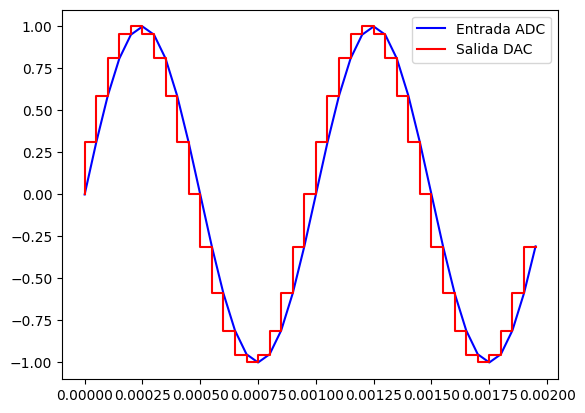

In [9]:
#Ejemplo 1.2.1. Cuantización de señales
#
fs = 20000 #Frecuencia de muestreo 20kHz
ts = 1/fs  #Periodo de muestreo

f0 = 1000  #Frecuencia fundamental 1kHz
t0 = 1/f0  #Periodo de la señal senoidal

#Muestrea la señal
t = np.arange(0, 2*t0, ts)  
x = np.sin(2 * np.pi * f0 * t)

#Aplica cuantización
N = 8
Nlevels = np.power(2,N-1)
xq = np.round(x*Nlevels)

fig, ax = plt.subplots()
ax.plot(t, x, 'b-', label='Entrada ADC')
ax.step(t, xq/Nlevels, 'r-', label='Salida DAC')
ax.legend(bbox_to_anchor=(1,1),loc='upper right')
plt.show()

En la práctica, el efecto de escalonamiento de la señal de salida, por efecto de la cuantización, se puede eliminar usando un filtro pasa-bajo analógico a la salida del DAC con frecuencia de corte $f_c=f_s/2$. Este filtro se denomina _filtro de reconstrucción_. Esta frecuencia se escoge, porque, como se se vio anteriormente, la máxima frecuencia que procesa un sistema digital es $f_{max}=f_s/2$. Igualmente, a la entrada del ADC, y con el fin de evitar el aliasing, algunos sistemas incluyen de manera opcional un filtro analógico pasa-bajo a la entrada con la misma especificación, llamado _filtro antialias_.

## Para reflexionar

Puede analizar del Ejemplo 1.2.1 que aumentando el número de bits se reduce el error de cuantización $|x - x_q|$, sin embargo, no necesariamente se mejora la forma en que se aprecia la forma de la señal a la salida del DAC. Para verificarlo, cambie en la simulación el número de bits usando N=6, N=16 y N=24. Notará muy poco cambio en la forma de onda. Por otra parte, si aumenta la frecuencia de muestreo a $f_s = 100kHz$ el efecto de la cuantización es más apreciable.

# 1.3. Frecuencia normalizada

Una señal senoidal continua $x(t)$ se expresa matemáticamente como 

$$x(t)=sen(\omega t)$$

donde $\omega=2\pi f$ corresponde a la frecuencia angular, en radianes por segundo, cuyo valor está definido en el intervalo $-\infty<\omega<\infty$, y $t$ es la variable independiente. La versión muestreada de una señal seno de frecuencia $\omega$ se puede representar como $x[n]=x(nT_{s})=sen(\omega nT_{s})$. Ahora como $T_{s}=\frac{1}{f_{s}}$:

$$x[n]=sen(2\pi\frac{f}{f_{s}}n)$$

al compararla con la señal original en tiempo continuo, tenemos que sí la variable independiente en tiempo discreto es $n$, la señal senoidal en tiempo discreto se puede expresar como

$$x[n]=sen(\Omega n)$$

y el término 

$$\Omega=2\pi\frac{f}{f_{s}}$$ 

corresponde a una frecuencia angular, que se denomina **_frecuencia normalizada_** y sus unidades son los radianes.

Cuando se realiza un diseño digital, las respuestas en frecuencia de los sistemas se modelan en términos de la frecuencia normalizada, puesto que recordemos que según el teorema del muestreo, la frecuencia máxima es $\frac{f_{s}}{2}$, así que en términos de la frecuencia normalizada, el eje de frecuencias en el dominio digital se restringe al rango $$-\pi\leq\Omega\leq\pi$$ y por tanto, frecuencias superiores a $\frac{f_{s}}{2}$ se mapean como componentes de baja frecuencia. En otras palabras, a un mismo $\Omega$ le corresponden infinitos valores de frecuencia en tiempo continuo. Según esta característica, la frecuencia normalizada ofrece una representación más coherente para describir un sistema digital ya que denota el efecto de circularidad del espectro que se mostró anteriormente.

La ventaja de trabajar con frecuencias normalizadas es que el comportamiento del sistema se describe de manera independiente de la frecuecia de muestreo, y su comportamiento en frecuencia se escala según dicha frecuencia. 

# 1.4. Representación de sistemas

Un sistema se define como un elemento que transforma una señal de entrada $x[n]$ en una señal de salida $y[n]$, donde la acción del sistema se representa como:

$$y[n]=\top\left\{ x[n]\right\}$$ 

En Python, la acción de un sistema se puede implementar a través de operaciones sobre los vectores que representan las señales, empleando operaciones simples con vectores o funciones especiales de la biblioteca numpy como las mostradas en la siguiente tabla:

| Expresión matemática del sistema | Equivalente en Python |
|------|------|
| $y[n] = x[n]-1$  | y = x-1 |
| $y[n] = sin(x[n])$ | y = np.sin(x) |
| $y[n] = cos(x[n])$ | y = np.cos(x) |
| $y[n] = (x[n])^2$ | y = np.power(x,2) |
| $y[n] = cos(\Omega_0 n) x[n]$  | y = np.cos(Omega0*n) * x |

Note que para el último sistema, basta con emplear el operador * para multiplicar dos vectores componente-componente (_element-wise multiplication_). Esta notación es única de Python, ya que en otros lenguajes se requiere emplear funciones más complejas. Python también incluye una función llamada ``np.multiply`` que hace exactamente lo mismo, pero su uso es más complejo. 

En el siguiente ejemplo se muestra como simular el sistema $$y[n] = cos(\Omega_0 n) x[n]$$ para lo cual se emplea la biblioteca **SciPy** para crear una señal cuadrada, $x[n]$, de ciclo útil 50% que oscila entre $[0,1]$. Note también que fue necesario desplazar y escalar la onda cuadrada dado que ``sig.square`` genera una onda en el rango $[-1,1]$. Existen otras formas de representar y simular los sistemas en tiempo discreto como se verá en las siguientes secciones.

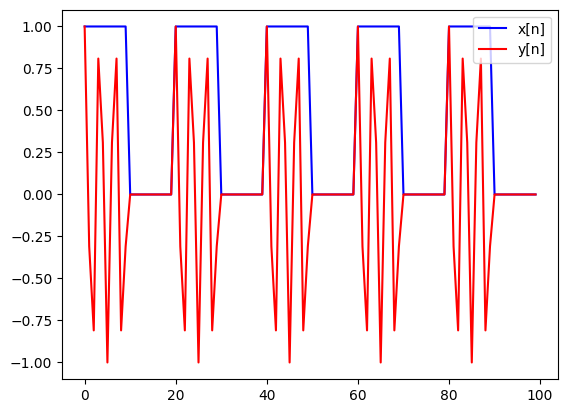

In [10]:
#Ejemplo 1.4.1. Simulación de un sistema en tiempo discreto
#
Omega0 = 0.6 * np.pi  #Frecuencia normalizada para la coseno
Omega1 = 0.1 * np.pi  #Frecuencia normalizada para la señal cuadrada 

n = np.arange(100)  #Genera valores de 0 a 99 para el vector de tiempo
x = (sig.square( n*Omega1, 0.5)+1)/2   #Señal cuadrada de ciclo útil del 50% que oscila entre 0 y 1
y = np.cos(Omega0*n)*x

fig, ax = plt.subplots()
ax.plot(x, 'b-', label='x[n]')
ax.plot(y, 'r-', label='y[n]')
ax.legend(bbox_to_anchor=(1,1),loc='upper right')
plt.show()

## 1.4.1. Propiedades de los sistemas

Un sistema se puede caracterizar según cumpla las propiedades de linealidad, invarianza en el tiempo, causalidad y estabilidad. Los sistemas **_lineales e invariantes en el tiempo (LTI)_** ofrecen propiedades adicionales que serán discutidas más adelante. Además, para efectos prácticos, en aplicaciones de procesamiento de señales en tiempo real, se prefiere trabajar con sistemas causales. Aunque los sistemas no causales se pueden usar para procesar señales previamente digitalizadas y almacenadas, por ejemplo, una grabación de audio.

1. **Linealidad**. Un sistema es lineal sí satisface la propiedad de homogeneidad y el teorema de superposición. 

a) Homogeneidad. $\widehat{y}[n]=\top\left\{ a\!x[n]\right\} =a\!y[n]$

b) Superposición. $\widehat{y}[n]=\top\left\{ a\!x_{1}[n]+b\!x_{2}[n]\right\} =a\!y_{1}[n]+b\!y_{2}[n]$ donde $y_{1}[n]=\top\left\{ x_{1}[n]\right\}$ y $y_{2}[n]=\top\left\{ x_{2}[n]\right\}$. 

2. **Invarianza en el tiempo**. Un sistema es invariante si se obtiene siempre la misma señal de salida ante el mismo estímulo de entrada sin importar el instante de tiempo donde se aplique: 

$$\hat{y}[n]=\top\left\{ x[n-m]\right\} =y[n-m]\qquad\forall n$$

3. **Causalidad**. Un sistema es causal sí su salida depende únicamente de la entrada actual, $x[n]$, y las entradas anteriores $x[n-k],k<0$. 

$$y[n]=f\left(x[n],x[n-1],x[n-2],...,x[n-P]\right)$$

4. **Estabilidad**. Un sistema es estable si ante una entrada acotada la salida está acotada:

$$Si \left|x[n]\right|<\infty,\:\forall n\:\Rightarrow\:\left|y[n]\right|<\infty,\:\forall n$$

### Para reflexionar

Un sistema es variante en el tiempo sí los coeficientes que acompañan a la señal de entrada, $x[n]$, o salida, $y[n]$ son funciones que dependen del tiempo $n$. Un sistema es no lineal cuando su ecuación incluye operadores no lineales. Un sistema es LTI si no incluye operadores no lineales y si los coeficientes que acompañan a $x[n]$ y $y[n]$ son constantes. Analice los siguientes sistemas:

* $y[n]=3x[n]-4x[n-1] \qquad$   LTI, causal, estable
* $y[n]=2y[n-1]+x[n+2] \qquad$   LTI, no causal, inestable
* $y[n]=nx[n] \qquad$      Lineal, variante en el tiempo, causal, estable 
* $y[n]=cos(x[n]) \qquad$     No lineal, invariante, causal, estable 
* $y[n]=(x[n])^{2} \qquad$     No lineal, invariante, causal, estable

## 1.4.2. Ecuaciones en diferencia de sistemas LTI

En procesamiento digital de señales es común encontrar descripciones de sistemas discretos en término de **_ecuaciones de diferencia_**, es decir, ecuaciones donde la señal de salida depende de valores previos o futuros de las señales de entrada o salida. Por ejemplo, el sistema descrito por la ecuación en diferencia

$$y[n] = x[n] - x[n-1]$$

se comporta como un derivador, puesto que para un instante particular $n$, la salida es la diferencia entre la muestra actual, $x[n]$ y la muestra de entrada que ingresó justo el instante de tiempo anterior, $x[n-1]$.

En forma general, la ecuación en diferencias de cualquier sistema LTI se define como:

$$\sum_{k=0}^{P}a_{k}y[n-k]=\sum_{k=0}^{Q}b_{k}x[n-k]$$

donde $\max(P,Q)$ define el orden de la ecuación en diferencias. Al igual que una ecuación diferencial en tiempo continuo, las ecuaciones en diferencias tienen una solución homogénea para $x[n]=0$, relacionada con el régimen transitorio de sistema, y una solución particular, relacionada con el régimen estacionario. Estos aspectos no serán abordados en este curso. 

Como se verá más adelante, todo sistema LTI se comporta en el dominio de la frecuencia como un **_filtro_**, por lo cual las ecuaciones en diferencia que incluyen coeficientes constantes como la mostrada anteriormente implementan un filtro digital. 

En Python, esta ecuación se implementa a través de la función ``lfilter`` de la biblioteca **SciPy** como se muestra en el siguiente ejemplo para la ecuación en diferencias

$$y[n] = \frac{1}{2} x[n] + x[n-2] - \frac{4}{5} y[n-1]$$

asumiendo como señal de entrada una diente de sierra (o _sawtooth_).

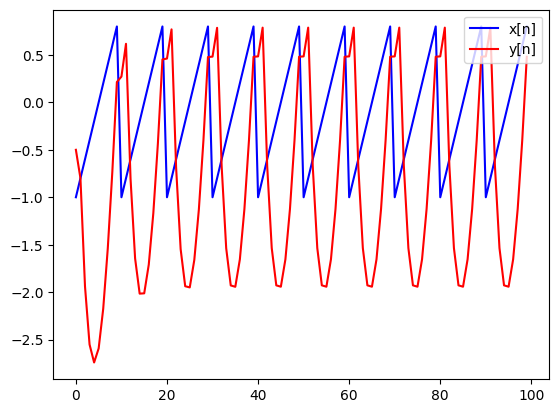

In [11]:
#Ejemplo 1.4.2. Simulación de una ecuación en diferencias
# 
Omega2 = 0.2 * np.pi  #Frecuencia normalizada para la señal diente de sierra 

n = np.arange(100)  #Genera valores de 0 a 99 para el vector de tiempo
x = sig.sawtooth( n*Omega2)   #Señal diente de sierra

ak = [1,-4/5]       #Coeficientes del filtro o ecuación en diferencias
bk = [0.5, 0, 1] 
y = sig.lfilter(bk, ak, x)

fig, ax = plt.subplots()
ax.plot(x, 'b-', label='x[n]')
ax.plot(y, 'r-', label='y[n]')
ax.legend(bbox_to_anchor=(1,1),loc='upper right')
plt.show()

La clave para implementar el sistema es identificar los coeficientes $a_k$ y $b_k$ de la ecuación en diferencia. Los $a_k$ son los coeficientes que acompañan la señal de salida $y$, notándose que $a_0$ es el coeficiente que acompaña al término $y[n]$ (la muestra que queremos calcular) y siempre es 1, $a_1$ el que acompaña a $y[n-1]$ y así sucesivamente. Por su parte, los $b_k$ son los coeficientes que acompañan la señal de entrada $x$. En este ejemplo, el sistema depende la muestra de entrada actual, $x[n]$, y la muestra de entrada hace dos instantes de tiempo $x[n-2]$.

## 1.4.3. Respuesta al impulso y tipos de filtros

Una señal elemental muy usada en procesamiento de señales es la _señal impulso unitario_ o simplemente señal delta definida como:

$$\delta[n]=\{ \begin{array}{c}1\:si\:n=0\\0\:si\:n\neq0\end{array}$$

La señal de salida de un sistema LTI ante la señal de entrada impulso unitario $\delta[n]$:

$$h[n]=\top\left\{ \delta[n]\right\}$$ 

se denomina _respuesta al impulso_ y es muy usada para caracterizar las propiedades del sistema, como se verá más adelante, o caracterizar los tipos de filtros digitales. 

De la ecuación en diferencias general presentada en la sección 1.4.2, si todos los coeficientes se normalizan por $a_0$ y se despeja $y[n]$, se desprenden dos casos:

* **Caso No Recursivo**. Cuando $P=0$, la E.D. se reduce a  $$y[n]=\sum_{k=0}^{Q}b_{k}x[n-k]$$ lo cual significa que la señal de salida depende exclusivamente de la entrada. Este tipo de ecuación conduce a la familia de filtros FIR (_Finite Impulse Response_) o filtros de respuesta finita al impulso que siempre son estables y dependen exclusivamente de ceros como se estudiará más adelante.

* **Caso Recursivo**. Cuando $P \neq 0$, la señal de salida se puede expresar como $$y[n] = \sum_{k=0}^{Q}b_{k}x[n-k] - \sum_{k=1}^{P}a_{k}y[n-k]$$ implicando que la señal de salida depende tanto de la entrada como de la salida, de allí que se denomine recursiva. Este tipo de ecuación conduce a la familia de filtros IIR (_Infinite Impulse Response_) o filtros de respuesta infinita al impulso, lo cuales pueden ser inestables ya que dependen tanto de ceros como de polos.

En el siguiente ejemplo se muestra como calcular, a nivel de simulación, la respuesta al impulso de los dos tipos de filtros creando una señal delta con la función ``unit_impulse`` y generando la salida con ``lfilter``. Note que la forma de las gráficas de $h[n]$ corresponde con las definiciones de FIR e IIR, longitud finita e infinita de la respuesta al impulso, respectivamente. Además, solo para el caso exclusivo del FIR, el único coeficiente $a_k$ diferente de cero es $a_0=1$ y los coeficientes $b_k$ son exactamente iguales a la respuesta al impulso $h[n]$. 

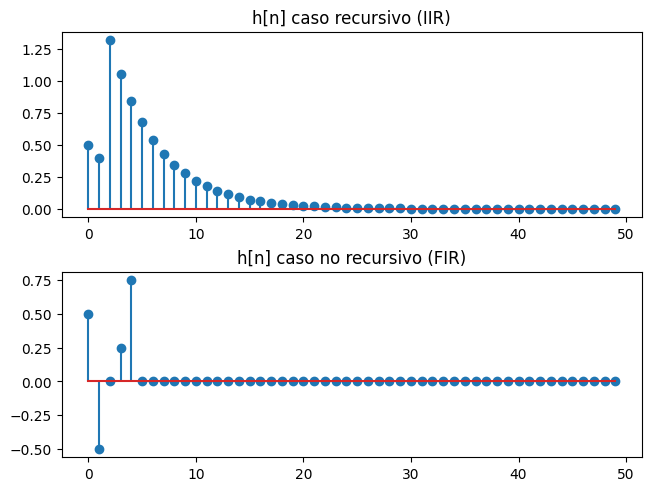

In [12]:
#Ejemplo 1.4.3. Cálculo de la respuesta al impulso
#
delta = sig.unit_impulse(50)  #Señal impulso unitario

#Respuesta al impulso de la E.D. Recursiva
ak1 = [1,-4/5]       
bk1 = [0.5, 0, 1] 
h1 =  sig.lfilter(bk1, ak1, delta)

#Respuesta al impulso de la E.D. No recursiva
bk2 = [1/2, -1/2, 0, 1/4, 3/4] 
h2 = sig.lfilter(bk2, 1, delta)

fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].stem(h1)
axs[0].set_title('h[n] caso recursivo (IIR)')
axs[1].stem(h2)
axs[1].set_title('h[n] caso no recursivo (FIR)')
plt.show()

### Para reflexionar

Un tipo de filtro digital FIR muy usado es el llamado _media móvil_ porque su E.D. toma la forma
$$y[n]=\frac{1}{Q}\sum_{k=0}^{Q}x[n-k]$$
lo que significa que calcula el promedio de las $Q$ muestras vecinas. ¿Cómo se explica esta descripción? ¿Cuál es la respuesta al impulso de un filtro de media móvil? ¿El filtro de media móvil es un FIR o un IIR?.

Una forma alternativa de describir el filtro de media móvil es la siguiente E.D. para el caso de Q=5:
$$y[n]=\frac{1}{5}(x[n-2]+x[n-1]+x[n]+x[n+1]+x[n+2])$$
¿Cómo se explica que esta E.D., que es de un sistema no causal, se pueda usar en la práctica para procesar ciertas señales reales? ¿Cómo es la respuesta al impulso de este filtro? ¿Cómo se puede identificar, a partir de la forma de la respuesta al impulso, que un filtro es no causal? 

## 1.4.4 Convolución

Para los sistemas LTI existe una representación muy simple y útil de expresar la acción del sistema, denominada **_sumatoria de convolución_**, la cual establece que la señal de salida de un sistema LTI se puede calcular a través de la convolución de la entrada $x[n]$ y la respuesta al impulso $h[n]$

$$y[n]= x[n]\star h[n] = \sum_{k=-\infty}^{\infty}x[k]h[n-k]$$

Lo que significa que la convolución es una operación que mezcla dos señales para producir una nueva señal. Esta sumatoria se puede interpretar como: la señal de salida corresponde a un promedio ponderado de las muestras pasadas y futuras de la señal de entrada, donde la contribución que tiene cada muestra $x[k]$ en la salida es igual a $h[n-k]$. Otra interpretación de la convolución es que la muestra de salida, $y[n]$, es el resultado de la sumatoria del producto entre la señal de entrada, $x[n]$, y la versión reflejada y desplazada de la respuesta al impulso, $h[n-k]$, hasta la posición $n$. 

La siguiente animación explica estas interpretaciones, para lo cual se grafican los términos $x[k]$ y $h[n-k]$ en la parte superior y $y[n]$ en la parte inferior para un valor específico de n (cuya posición se indica con una flecha). De clic en ▷ y mueva el slider (cambie el valor de n). Podrá notar que la muestra de salida en la posición $n$ es la sumatoria del producto de $x$ y la versión reflejada de $h$ ubicada en dicha posición.

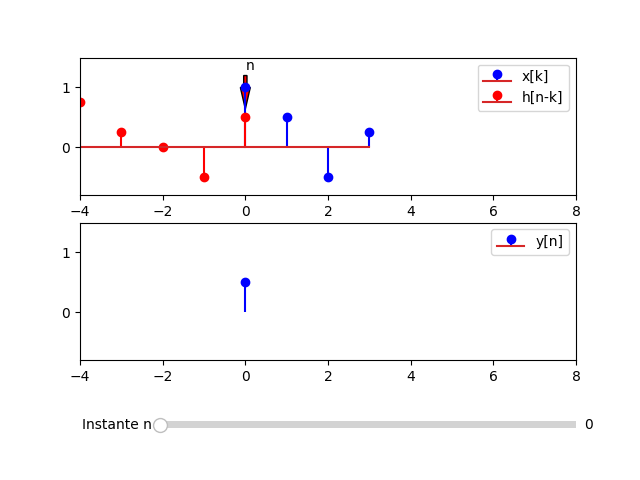

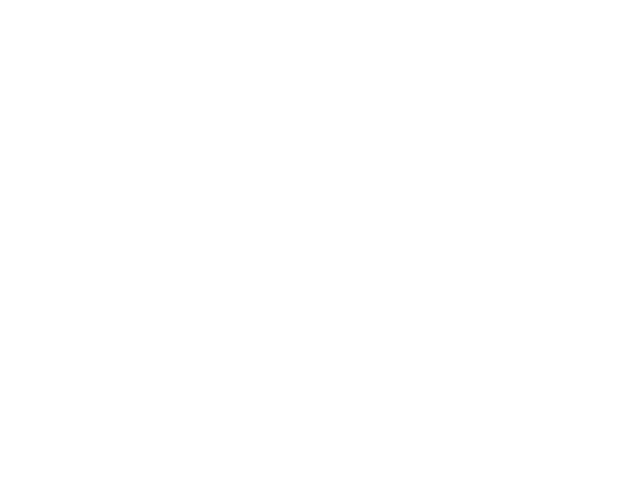

In [23]:
#Simulación del cálculo de la convolución
%matplotlib widget
%run cap1_conv_anim.py

La convolución es una operación conmutativa, pues si se hace el cambio de variable $u=n-k$

$$y[n]= x[n]\star h[n] = \sum_{u=-\infty}^{\infty}x[n-u]h[u]$$

La forma de la respuesta impulso también brinda información acerca de ciertas propiedades del sistema LTI. Por ejemplo, sí $h[n]=0$ para todos los valores de $n<0$, se dice que el sistema es causal; y sí $\sum_{n=-\infty}^{\infty}\left|h[n]\right|<\infty$, el sistema será estable.

Por consiguiente, se puede decir que la respuesta al impulso es la huella dactilar que identifica las características y comportamiento del sistema LTI. En la mayoría de los sistemas LTI, $h[n]$ es una secuencia no causal de longitud infinita, sin embargo, para efectos prácticos de diseño de sistemas digitales LTI, se escoge una respuesta al impulso causal de longitud $N_{h}$, es decir, $h[n]=0$ para los rangos de $n<0$ y $n\geq N_{h}$. En este caso, los límites de la sumatoria de convolución se reducen a:

$$y[n]=\sum_{k=0}^{N_h - 1}x[n-k]h[k]$$

Esta expresión coincide con la definición de filtros digitales FIR presentada anteriormente y es la razón por la cual se denominan de esta forma, ya que ante una entrada impulso, $\delta[n]$, la salida $y[n]$, que será la respuesta al impulso $h[n]$ generará un número finito de muestras como se mostró en la simulación de la sección anterior. Igualmente, para los filtros FIR, es claro que los coeficientes $b_k$ son exactamente iguales a la respuesta al impulso $$b_k = h[k]$$

En el siguiente ejemplo, se calculará una convolución usando la función ``convolve`` de la biblioteca **SciPy** para un filtro FIR en lugar de ``lfilter``. Se puede demostrar con este ejemplo, que sí $x[n]$ tiene longitud $N_{x}$, la longitud de la secuencia de salida será:

$$N=N_{h}+N_{x}-1$$

Esta ecuación será empleada posteriormente para calcular la convolución lineal a partir de la convolución circular usando transformadas rápidas de Fourier (FFT).

Longitud de la señal de salida
(8,)


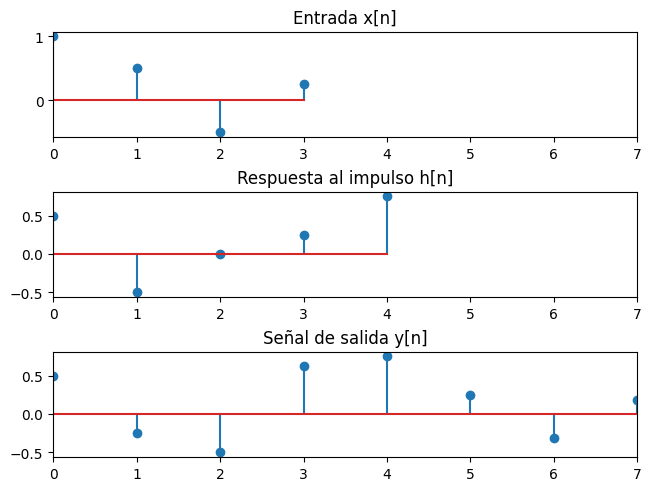

In [13]:
#Ejemplo 1.4.4. Cálculo de la convolución
# 
x  = [1, 1/2, -1/2, 1/4]       #Señal de entrada Nx=4
h = [1/2, -1/2, 0, 1/4, 3/4]   #Señal de salida Nh=5
y = sig.convolve(x, h)  #Cálculo de la convolución

print("Longitud de la señal de salida")
print(y.shape)

fig, axs = plt.subplots(3,1,layout='constrained')
axs[0].stem(x)
axs[0].set(xlim=(0, 7)) 
axs[0].set_title('Entrada x[n]')
axs[1].stem(h)
axs[1].set(xlim=(0, 7)) 
axs[1].set_title('Respuesta al impulso h[n]')
axs[2].stem(y)
axs[2].set(xlim=(0, 7)) 
axs[2].set_title('Señal de salida y[n]')
plt.show()

### Para reflexionar

Anteriormente se definió el filtro de media móvil como un filtro FIR cuya respuesta al impulso es $h[n]=\frac{1}{N_h} [1 \: 1 \: 1 \: ... \: 1]$ que implica el promedio de las muestras vecinas. Para analizar el por qué de este nombre, en la siguiente simulación se creará una señal senoidal contaminada de ruido y se usará un filtro de media móvil de $N_h=3$. 

Analice el efecto de usar longitudes mayores de $N_h$ desde el punto de vista de que tan efectivo es el filtro de media móvil para eliminar el ruido y que ocurre con el retardo en la respuesta de salida.

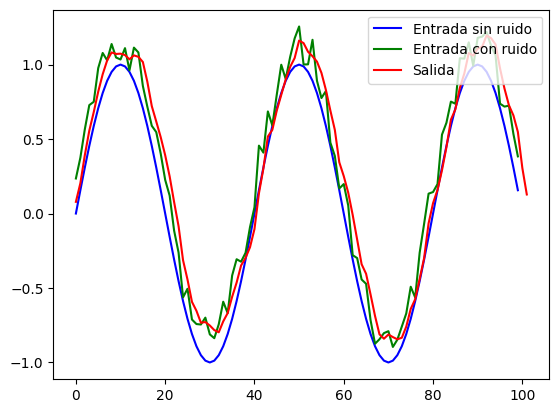

In [18]:
Ndata = 100
n = np.arange(Ndata)

#Señal de entrada
omega0 = 0.05*np.pi 
x_c  = np.sin( n*omega0 )
x = x_c + 0.3*np.random.rand(Ndata) 

#Respuesta al impulso del media móvil
Nh = 3
h = (1/Nh)*np.ones((Nh,))  

#Cálculo de la convolución
y = sig.convolve(x, h)
fig, ax = plt.subplots()
ax.plot(x_c, 'b-', label='Entrada sin ruido')
ax.plot(x, 'g-', label='Entrada con ruido')
ax.plot(y, 'r-', label='Salida')
ax.legend(bbox_to_anchor=(1,1),loc='upper right')
plt.show()

# 1.5. Espectro de una señal discreta y DTFT (_Discrete-Time Fourier Transform_)



Se debe recordar que el espectro de una señal continua $x(t)$ se define como la transformada de Fourier de dicha señal $X(f)$:
$$ X(f) = \mathcal{F}\left\{ x(t) \right\} $$

Se puede demostrar que si una señal continua $x(t)$ se muestrea, el espectro resultante está dado por:

$$ X_s(f) = \frac{1}{T_s} \sum_{k=-\infty}^{\infty}X(f-k f_s) $$

Es decir, que el espectro de una señal discreta, $X_s(f)$ es el resultado de infinitas réplicas del espectro de la señal continua $X(f)$ centrado cada múltiplo entero de la frecuencia de muestreo ($k f_s$) como se muestra en la siguiente animación. 

De clic en ▷ para iniciar la animación y cambie el valor de la frecuencia de muestreo. Este valor está dado en múltiplos enteros de la frecuencia máxima por lo que al iniciar la animación empieza en $f_s = 3 f_{max}$. Analice lo que ocurre cuando se presenta aliasing ($f_s < 2 f_{max}$) y cuando se toman valores en el caso límite establecido por el teorema del muestreo ($f_s = 2 f_{max}$). 

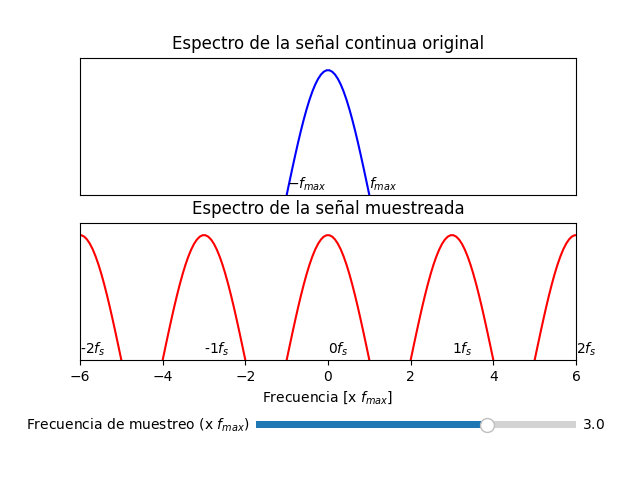

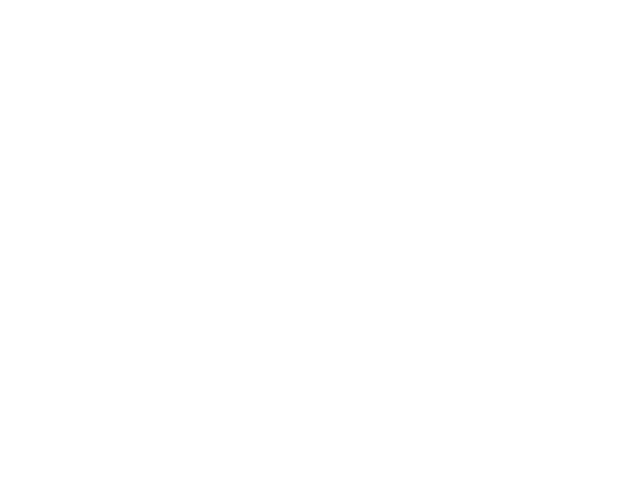

In [24]:
#Simulación del espectro de una señal discreta.
#En rojo se muestra el espectro de la señal continua original antes del muestreo.
%matplotlib widget
%run cap1_spect_anim.py

De la animación se concluye que el espectro contenido en el rango de frecuencia en Hertz $$-\frac{f_s}{2} \leq f \leq \frac{f_s}{2}$$ se repite periódicamente a lo largo del eje de frecuencia. Por esta razón, la transformada de Fourier convencional que se emplea en tiempo continuo para obtener $X_s(f)$ no es una representación muy conveniente. En su lugar se prefiere una alternativa más compacta que involucre la periodicidad del espectro en función de la frecuencia normalizada $\Omega$. Esta representación es la _transformada de Fourier de tiempo discreto_ o también llamada **DTFT** por sus siglas en inglés _Discrete-Time Fourier Transform_:

$$X(\Omega)=\sum_{n=-\infty}^{\infty}x[n]\exp(-j\Omega n)$$

donde $\Omega$ es la frecuencia normalizada 

$$\Omega = 2\pi \frac{f}{f_s}$$

Por lo tanto, $X(\Omega)$ se grafica únicamente en el rango $$-\pi \leq \Omega \leq \pi$$

debido a la circularidad de la frecuencia normalizada que fue explicada en secciones anteriores y a que $\Omega = \pi$ es equivalente a una frecuencia en Hertz de $\frac{f_s}{2}$. 

Para frecuencias en Hertz por fuera del rango $[-\frac{f_s}{2},\frac{f_s}{2}]$, se presenta aliasing, lo cual implica que el valor de $\Omega$ se mapea a un número en el rango $-\pi \leq \Omega \leq \pi$. Es decir, la longitud infinita del espectro mostrada en la animación está implícita en la frecuencia normalizada $\Omega$. 

A lo largo del libro se considerarán exclusivamente señales discretas por lo que se usará el nombre _transformada de Fourier_ para referirse a la _DTFT_.

La transformada de Fourier brinda información sobre las componentes de frecuencia que posee la señal $h[n]$, en otras palabras, su espectro de frecuencias. Puesto que $X(\Omega)$ es una cantidad compleja, se acostumbra estudiar el espectro de una señal en términos de su magnitud ($\left|H(\Omega)\right|$ y fase $(\Phi(\Omega)$), relacionados mediante:

$$\left|X(\Omega)\right|=\sqrt{\Re e\left\{ X(\Omega)\right\} ^{2}+\Im m\left\{ X(\Omega)\right\} ^{2}}$$

$$\Phi(\Omega)=\arctan\left(\frac{\Im m\left\{ X(\Omega)\right\} }{\Re e\left\{ X(\Omega)\right\} }\right)$$

En el siguiente ejemplo se muestra como usar el comando ``freqz`` para graficar la DTFT y graficar la magnitud y fase del espectro de una señal. Note que ``freqz`` retorna dos vectores, un vector complejo con el espectro ``Xw`` y el vector del eje de frecuencia ``w`` que tiene los valores de la frecuencia normalizada $\Omega$ en el rango $[0,\pi]$. ``freqz`` asume que el espectro es simétrico por lo cual no retorna la región de frecuencias negativas. Además, se usa ``np.abs(Xw)`` para calcular la magnitud y ``np.unwrap(np.angle(Xw))`` para calcular la fase.

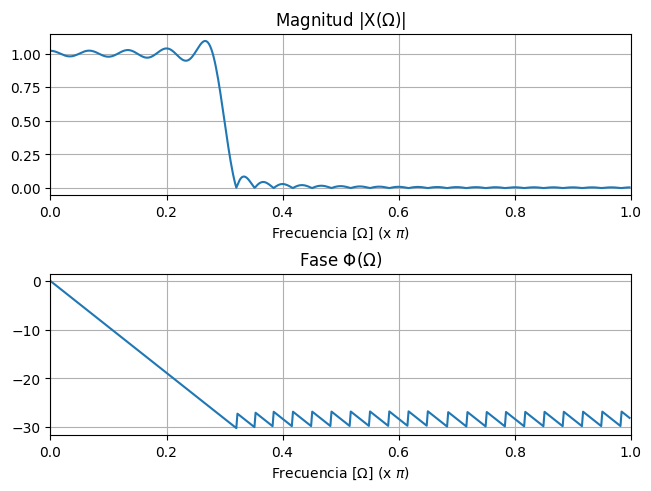

In [19]:
#Ejemplo 1.5.1. Cálculo del espectro de una señal con DTFT
#
#Señal
n = np.arange(-30,30)
x = 0.3*np.sinc(0.3*n)
#Cálculo DTFT
w, Xw = sig.freqz(x)
#Grafica magnitud y fase
fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].plot(w/np.pi, np.abs(Xw))
axs[0].set_xlabel(r'Frecuencia [$\Omega$] (x $\pi$)')
axs[0].set_title(r'Magnitud |X($\Omega$)|')
axs[0].set(xlim=(0,1))
axs[0].grid()
axs[1].plot(w/np.pi, np.unwrap(np.angle(Xw)))
axs[1].set_xlabel(r'Frecuencia [$\Omega$] (x $\pi$)')
axs[1].set_title(r'Fase $\Phi$($\Omega$)')
axs[1].set(xlim=(0,1))
axs[1].grid()
plt.show()

Sí se calcula la DTFT a la la respuesta al impulso, $h[n]$, se obtiene $H(\Omega)$ que corresponde a la respuesta en frecuencia del sistema LTI. ``freqz`` está realmente diseñada para calcular la respuesta en frecuencia de un filtro, pero puede usarse para calcular la DTFT como se mostró en el ejemplo anterior.

Debe recordarse que todo filtro digital, FIR o IIR, se describe en términos de la ecuación en diferencia 
$$\sum_{k=0}^{P}a_{k}y[n-k]=\sum_{k=0}^{Q}b_{k}x[n-k]$$

Por lo tanto, si se quiere usar ``freqz`` para calcular $H(\Omega)$ la forma de hacerlo es pasarle los coeficientes $a_k$ y $b_k$ de la E.D. como se muestra en el siguiente ejemplo.

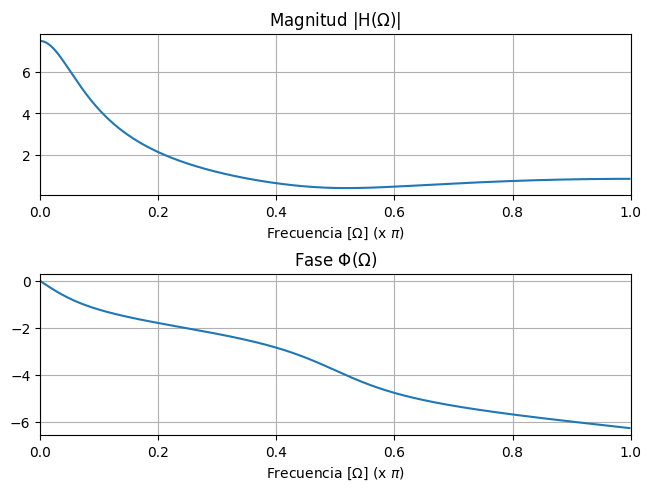

In [20]:
#Ejemplo 1.5.2. Cálculo de la respuesta en frecuencia del Ejemplo 1.4.2
#  
ak = [1,-4/5]       #Coeficientes del filtro o ecuación en diferencias
bk = [0.5, 0, 1] 

#Cálculo DTFT
w, Hw = sig.freqz(bk,ak)
#Grafica magnitud y fase
fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].plot(w/np.pi, np.abs(Hw))
axs[0].set_xlabel(r'Frecuencia [$\Omega$] (x $\pi$)')
axs[0].set_title(r'Magnitud |H($\Omega$)|')
axs[0].set(xlim=(0,1))
axs[0].grid()
axs[1].plot(w/np.pi, np.unwrap(np.angle(Hw)))
axs[1].set_xlabel(r'Frecuencia [$\Omega$] (x $\pi$)')
axs[1].set_title(r'Fase $\Phi$($\Omega$)')
axs[1].set(xlim=(0,1))
axs[1].grid()
plt.show()

A continuación se listan algunas de las propiedades más importantes de la DTFT:

1. Transformada Inversa

$$x[n]=\frac{1}{2\pi}\int_{2\pi}X(\Omega)\exp(j\Omega n)d\Omega$$

2. Linealidad

$$ax_{1}[n]+bx_{2}[n]\quad\leftrightarrow\quad aX_{1}(\Omega)+bX_{2}(\Omega)$$

3. Desplazamiento en el tiempo

$$x[n-n_{0}]\quad\leftrightarrow\quad\exp(-j\Omega n_{0})X(\Omega)$$

4. Desplazamiento en la frecuencia

$$\exp(j\Omega_{0}n)x[n]\quad\leftrightarrow\quad X(\Omega-\Omega_{0})$$

5. Convolución

$$x_{1}[n]\star x_{2}[n]\quad\leftrightarrow\quad X_{1}(\Omega)X_{2}(\Omega)$$

6. Modulación

$$x_{1}[n]x_{2}[n]\quad\leftrightarrow\quad\frac{1}{2\pi}\int_{2\pi}X_{1}(\lambda)X_{2}(\Omega-\lambda)d\lambda = \frac{1}{2\pi}X_{1}(\Omega)\star X_{2}(\Omega)$$

# 1.6. Transformada Rápida de Fourier (FFT: _Fast Fourier Transform_)

Puesto que la DTFT de una señal discreta, $X(\Omega)$, es una función continua, desarrollar un método computacional que permita calcular en forma eficiente la transformada de Fourier y su inversa de señales de larga longitud, no sería tarea simple si se utilizara la expresión $X(\Omega)=\sum_{n=-\infty}^{\infty}x[n]\exp(-j\Omega n)$. Lo preferible sería usar una transformada de Fourier que dada una señal discreta de longitud finita de $N$ muestras, entregue otra secuencia de datos de igual longitud. Este es el principio de la _Transformada Discreta de Fourier (DFT)_.

Si bien en la sección anterior se mostró que el comando ``freqz`` de Scipy permite calcular DTFT, esta función es impráctica para señales de larga longitud, por lo que su uso se debe restringir al cálculo de la respuesta en frecuencia como se mostró en el Ejemplo 1.5.2. 

La idea básica de la DFT consiste en muestrear el espectro continuo $X(\Omega)$, tomando $N$ muestras del rango de valores $0\leq\Omega\leq2\pi$, es decir, la relación entre el índice $k$ de la muestra de frecuencia y la frecuencia normalizada $\Omega$ es:

$$\Omega=2\pi\frac{k}{N}$$

Al efectuar la sustitución en la ecuación de la DTFT y teniendo en cuenta que $x[n]$ tiene longitud $N$, obtenemos la definición de la DFT:

$$X[k]=\sum_{n=0}^{N-1}x[n]\exp\left(-j2\pi\frac{kn}{N}\right)$$

La inversa (IDFT) se convierte entonces en:

$$x[n]=\frac{1}{N}\sum_{k=0}^{N-1}X[k]\exp\left(j2\pi\frac{kn}{N}\right)$$

Como la variable independiente adopta valores discretos entre $0$ y $N-1$, se tiene que las muestras de frecuencia entre los índices $\frac{N}{2}\leq k\leq N-1$, corresponden a la región de frecuencias negativas. Esto se hará más evidente en el siguiente ejemplo.

Aunque la DFT cumple con las mismas propiedades de la transformada de Fourier de una señal discreta, esta asume en forma implícita que $h[n]$ se trata de una señal periódica con período $N$ muestras.

En la práctica, un algoritmo que calcule la DFT con las sumatorias de arriba es impráctico, dado a que tiene un costo computacional que crece cuadráticamente con la longitud de la señal $O(N^2)$, por lo que se recurre a un algoritmo eficiente llamado **_Transformada Rápida de Fourier_** o **_FFT_** por sus siglas en inglés _Fast Fourier Transform_. Este algoritmo tiene un costo computacional menor, $O(N log_2 N)$ que se explicará más adelante en el Capítulo 7. En el siguiente ejemplo en Python se muestra como calcular la FFT de una señal de audio. 

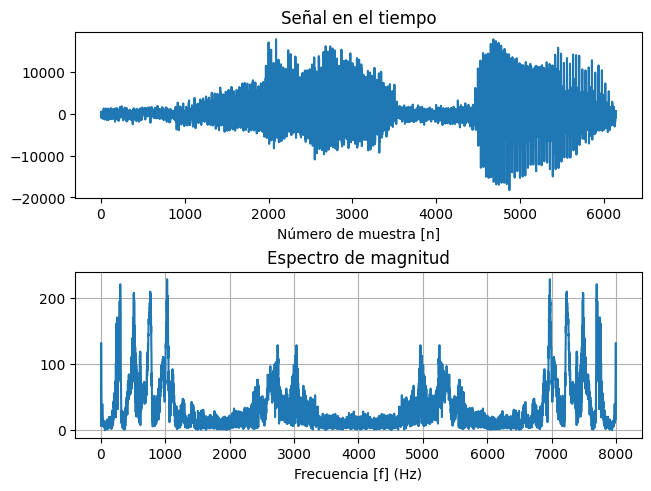

In [3]:
#Ejemplo 1.6.1. Cálculo de la FFT de un archivo de audio
#
from scipy.io import wavfile
from scipy.fft import fft
#Carga un archivo externo WAV
fs, x = wavfile.read('limonruido1.wav')

#Calcula la FFT de x
Xk = fft(x)

#Grafica
fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].plot(x)
axs[0].set_title('Señal en el tiempo')
axs[0].set_xlabel('Número de muestra [n]')
f = np.linspace(0,fs,len(x))
axs[1].plot(f,np.abs(Xk)/len(x))
axs[1].set_title('Espectro de magnitud')
axs[1].set_xlabel('Frecuencia [f] (Hz)')
#axs[1].set(xlim=(0,fs/2))
axs[1].grid()
plt.show()

En el ejemplo anterior, se empleó una ecuación equivalente a $\Omega=2\pi\frac{k}{N}$ pero usando la frecuencia en Hertz
$$f=f_s \frac{k}{N}$$
para definir el eje de frecuencias. 

Asimismo, como se verá en el Capítulo 7, la amplitud de la FFT está escalada por la longitud de la señal $N$, de allí que al graficar la magnitud sea necesario normalizarla por $N$. 

# 1.7. Funciones de transferencia

Apliquemos a un sistema LTI una señal exponencial compleja del tipo $x[n]=z^{n}$:

$$y[n]=\sum_{k=-\infty}^{\infty}h[k]x[n-k]=\sum_{k=-\infty}^{\infty}h[k]z^{n-k}=z^{n}\sum_{k=-\infty}^{\infty}h[k]z^{-k}=z^{n}H(z)$$

Es decir, al aplicar una exponencial compleja a un sistema, obtendremos como respuesta, la misma señal de entrada pero multiplicada por la transformada z de la respuesta al impulso. La transformada z de la respuesta al impulso, $H(z)$, se denomina **_función de transferencia_** del sistema y es igual a la relación entre las transformadas z de la salida y la entrada: 

$$H(z)=\frac{Y(z)}{X(z)}=\sum_{k=-\infty}^{\infty}h[k]z^{-k}$$

Este resultado puede demostrarse en términos matemáticos a través de una ecuación de valores propios $\mathbf{y}=\mathcal{L}\mathbf{x}=\lambda\mathbf{x}$, donde $\mathcal{L}$ es el operador que denota la operación de convolución (acción del sistema LTI), y $\lambda$  son los valores propios del operador $\mathcal{L}$, así que la función de transferencia del sistema no es más que los valores propios de un sistema LTI y las exponenciales complejas sus funciones propias.

La transformada z y su inversa están definidas para una señal $x[n]$ como:

$$X(z) =	\sum_{n=-\infty}^{\infty}x[n]z^{-n}$$
$$x[n]	=	\frac{1}{2\pi j}\oint_{C}X(z)z^{n-1}dz$$

donde la transformada inversa se calcula sobre un círculo cerrado, C, que envuelve el origen y la región donde la transformada z existe, llamada región de convergencia (ROC). Por lo general, la variable compleja z está definida como $z=e^{j\Omega}$, con $\Omega$ la frecuencia normalizada y toma valores entre $-\pi...\pi$, por lo que la ROC se trata en este caso de un circunferencia de radio unitario. 

En forma general, la función de transferencia de un sistema LTI como el presentado en la Sección 1.4.2 se puede expresar como una expresión algebraica del tipo:

$$H(z)=\frac{B(z)}{A(z)}=\frac{b_{0}+b_{1}z^{-1}+b_{2}z^{-2}+...+b_{Q}z^{-Q}}{1+a_{1}z^{-1}+a_{2}z^{-2}+...+a_{P}z^{-P}}$$

donde las raíces del polinomio numerador, $B(z)$ se denominan los ceros del sistema, y las raíces del polinomio denominador, $A(z)$, los polos del sistema. Los polos son determinantes en la estabilidad de un sistema LTI. Sí todos los polos de un sistema LTI se encuentran dentro del círculo de radio unitario, el sistema será estable.

En el siguiente ejemplo se muestra como crear un objeto Función de Transferencia en Python, con el cual se puede extraer la ubicación de los polos y los ceros, y graficarlos. En la gráfica se incluye el círculo unitario para analizar la estabilidad del sistema. Como el polo está dentro del círculo unitario, el sistema es estable.

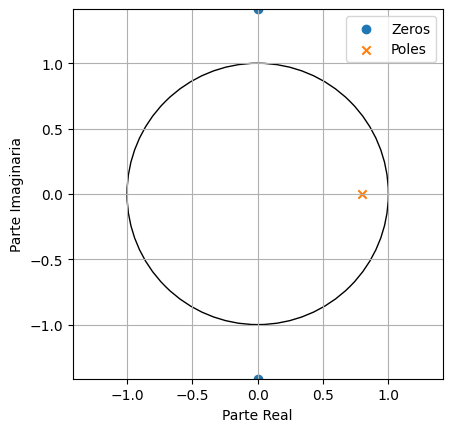

In [22]:
#Ejemplo 1.7.1. Gráfica del diagrama de polos y ceros del sistema LTI del ejemplo 1.4.2
#
ak = [1,-4/5]       #Coeficientes del filtro o ecuación en diferencias
bk = [0.5, 0, 1] 
#Crea la función de transferencia
sys = sig.TransferFunction(bk, ak, dt=0.1)

def zplane(sys):
    #Grafica la ubicación de polos y ceros
    fig, ax = plt.subplots()
    ax.scatter(sys.zeros.real, sys.zeros.imag, marker='o', label='Zeros')
    ax.scatter(sys.poles.real, sys.poles.imag, marker='x', label='Poles')
    ax.set_xlabel('Parte Real')
    ax.set_ylabel('Parte Imaginaria')
    ax.grid(True)
    ax.legend()
    #Superpone el círculo unitario
    unit_circle = plt.Circle((0, 0), 1 , fill = False)
    ax.set_aspect(1)
    ax.add_artist(unit_circle)
    maxv = np.max([np.max(np.abs(sys.zeros.real)), np.max(np.abs(sys.zeros.imag)), np.max(np.abs(sys.poles.real)), np.max(np.abs(sys.zeros.imag)), 1])
    ax.set(xlim=(-maxv,maxv), ylim=(-maxv,maxv))
    plt.show()

zplane(sys)

# 1.8 Reflexión Final

Hasta este punto usted debe ser capaz de responder las siguientes preguntas:

* ¿Qué es el aliasing?
* ¿Cuál es la frecuencia máxima que procesa un sistema discreto si la frecuencia de muestreo se fija a un valor $f_s$?
* ¿Qué representa la convolución?
* ¿Cómo es la ecuación matemática de la convolución?
* ¿Cómo se representa matemáticamente un sistema LTI usando la notación de convolución?
* ¿Qué significado tiene h[n] en la ecuación de convolución para denotar un sistema LTI?
* ¿Con que comando en Python se calcula la convolución?
* ¿Con que comando en Python se implementa una ecuación en diferencias y que significado tienen los parámetros?
* ¿Qué otro nombre reciben los sistemas LTI?
* ¿Qué características tiene un filtro digital FIR?
* ¿Qué características tiene un filtro digital IIR?
* Para un filtro FIR, ¿Quién es bk y ak en la ecuación en diferencias general de un sistema LTI?
* ¿Qué valores toma el eje de frecuencia en el espectro de una señal discreta?
* ¿Qué es la respuesta en frecuencia de un filtro?
* ¿Qué comando en Python permite graficar la respuesta en frecuencia de un filtro?
* ¿Cuál es la forma más eficiente de calcular el espectro de una señal?
* ¿Para qué se usa la función de transferencia?
* ¿Cuál es la forma genérica de una función de transferencia de un sistema LTI? 
* ¿Cómo se determina la estabilidad de un sistema LTI? 